In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('Healthcare-Diabetes.csv')
df.head()



,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
if "Id" in df.columns:
    df = df.drop("Id",axis=1)

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB
None
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890  

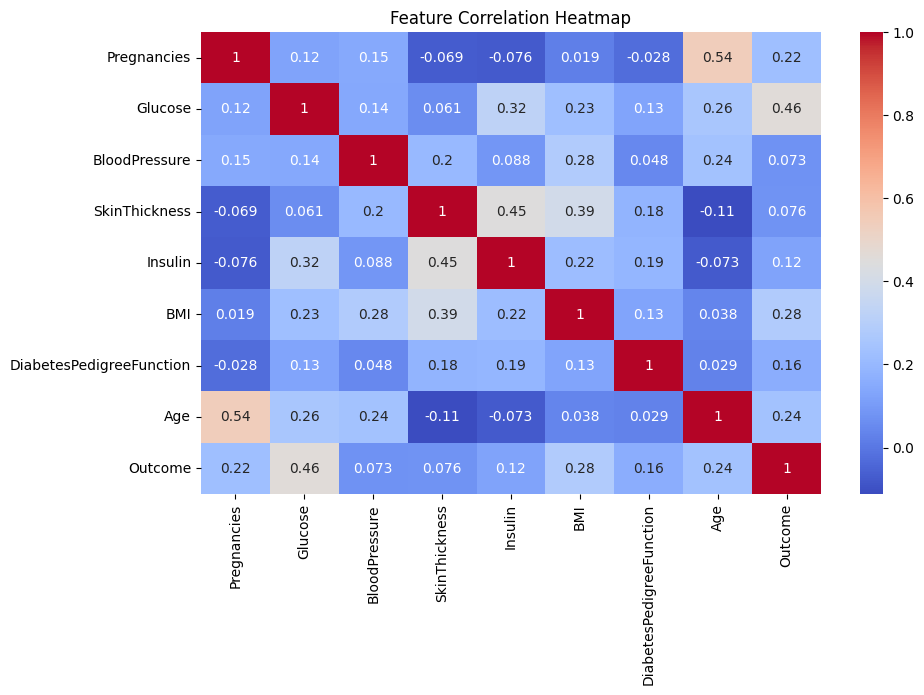

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

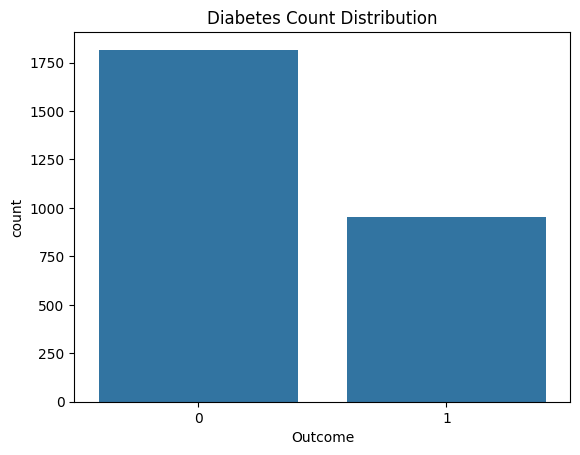

In [6]:
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Count Distribution")
plt.show()

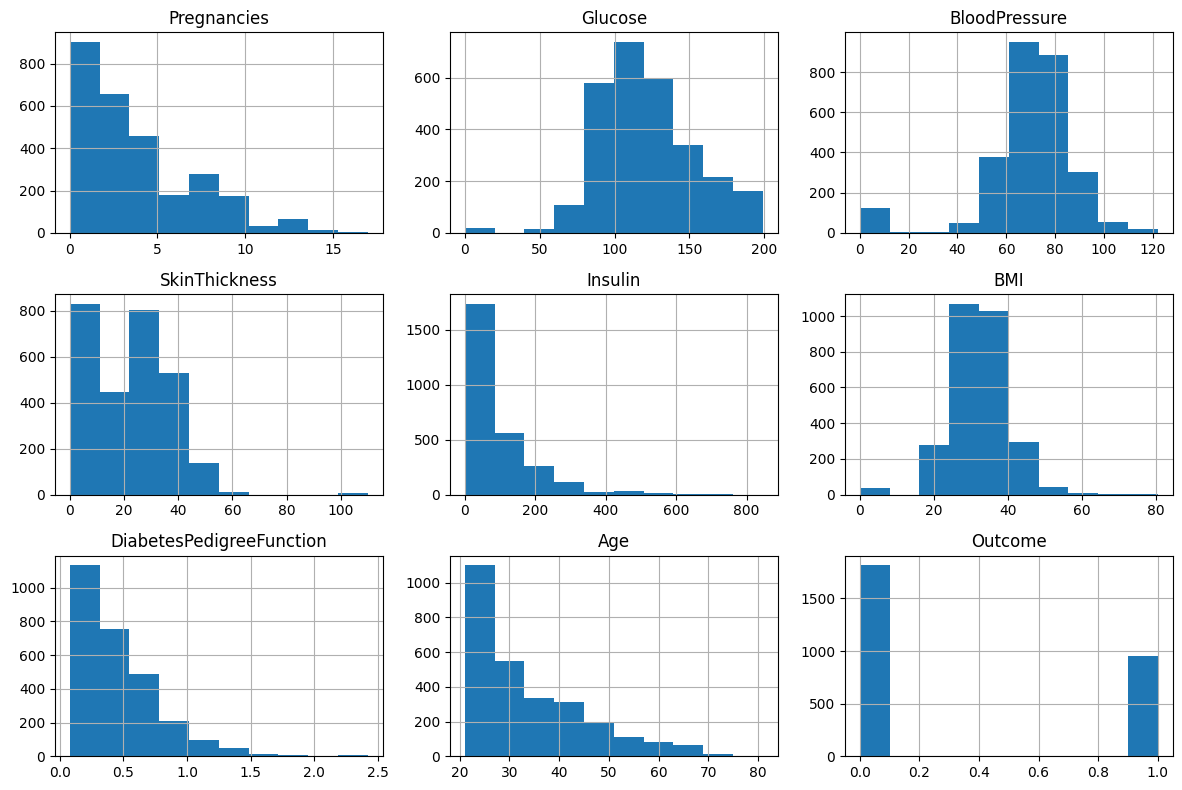

In [7]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

In [8]:
# Splitting features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    acc = accuracy_score(y_test, prediction)
    results[name] = acc
    print(f"📌 Model: {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print("Classification Report:\n", classification_report(y_test, prediction))
    print("-"*50)

📌 Model: Logistic Regression
Accuracy: 0.7743682310469314
Confusion Matrix:
 [[331  36]
 [ 89  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554

--------------------------------------------------
📌 Model: KNN
Accuracy: 0.868231046931408
Confusion Matrix:
 [[326  41]
 [ 32 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       367
           1       0.79      0.83      0.81       187

    accuracy                           0.87       554
   macro avg       0.85      0.86      0.85       554
weighted avg       0.87      0.87      0.87       554

--------------------------------------------------
📌 Model: SVM


In [10]:
best_model_name = max(results, key=results.get)
print("\n🔥 Best Model Found:", best_model_name, "with accuracy:", results[best_model_name])


🔥 Best Model Found: Random Forest with accuracy: 0.9819494584837545


In [11]:
import joblib
joblib.dump(models[best_model_name], "diabetes.pkl")
print("Model saved successfully!")

Model saved successfully!
